In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt


tempfile = "C:/Users/Zane/Documents/Downloads/temp"
popfile = "C:/Users/Zane/Documents/Downloads/pop"

pwd = os.getcwd()
os.chdir(os.path.dirname(trainFile))
temp = pd.read_csv(os.path.basename(tempfile))
pop = pd.read_csv(os.path.basename(popfile))
os.chdir(pwd)

pd.set_option("display.max_rows", 300)

#### Notes



In [249]:
df = temp.merge(pop,how='left',left_on='name',right_on='City')
df['location_date'] = pd.to_datetime(df['location_date'])
df['month']=df['location_date'].dt.month
df['year']=df['location_date'].dt.year
df.dropna(inplace=True)

In [250]:
monthly = df.groupby(['month','year']).mean()[['temp_mean_c','temp_min_c','temp_max_c']].reset_index()
monthly.rename(columns={'temp_mean_c' : 'monthly_mean_c',
                        'temp_min_c' : 'monthly_min_c',
                        'temp_max_c' : 'monthly_max_c'},inplace=True)

In [252]:
res = pd.DataFrame(df.groupby('location_date').apply(lambda l: pd.Series({'temp_mean_c' : 
                                 (l['temp_mean_c'] * l['population']).sum() / l['population'].sum(),
                                                                          
                                                                          'temp_min_c' : 
                                 (l['temp_min_c'] * l['population']).sum() / l['population'].sum(),
                                                                           
                                                                           'temp_max_c' : 
                                 (l['temp_max_c'] * l['population']).sum() / l['population'].sum()
                                                                          
                }))).reset_index()

In [253]:
res['location_date'] = pd.to_datetime(res['location_date'])
res['month']=res['location_date'].dt.month
res['year']=res['location_date'].dt.year
res.dropna(inplace=True)

In [254]:
mgd = res.merge(monthly,how='left',on=['month','year'])
mgd

,location_date,temp_mean_c,temp_min_c,temp_max_c,month,year,monthly_mean_c,monthly_min_c,monthly_max_c
0,2015-01-01,2.710148,-1.400157,6.804778,1,2015,3.250112,-0.976022,7.679247
1,2015-01-02,4.664285,0.929235,8.536304,1,2015,3.250112,-0.976022,7.679247
2,2015-01-03,5.757096,1.147500,10.429004,1,2015,3.250112,-0.976022,7.679247
3,2015-01-04,6.671788,1.116455,12.681341,1,2015,3.250112,-0.976022,7.679247
4,2015-01-05,4.957696,-0.862371,11.365982,1,2015,3.250112,-0.976022,7.679247
...,...,...,...,...,...,...,...,...,...
2283,2021-04-16,12.986976,8.881555,17.346124,4,2021,13.448713,7.918865,19.213356
2284,2021-04-17,13.191963,8.739310,17.633252,4,2021,13.448713,7.918865,19.213356
2285,2021-04-18,15.173378,8.824164,21.944647,4,2021,13.448713,7.918865,19.213356
2286,2021-04-19,14.925051,8.842966,21.110548,4,2021,13.448713,7.918865,19.213356


### Pop-Weighted Mean/Min/Max By Date

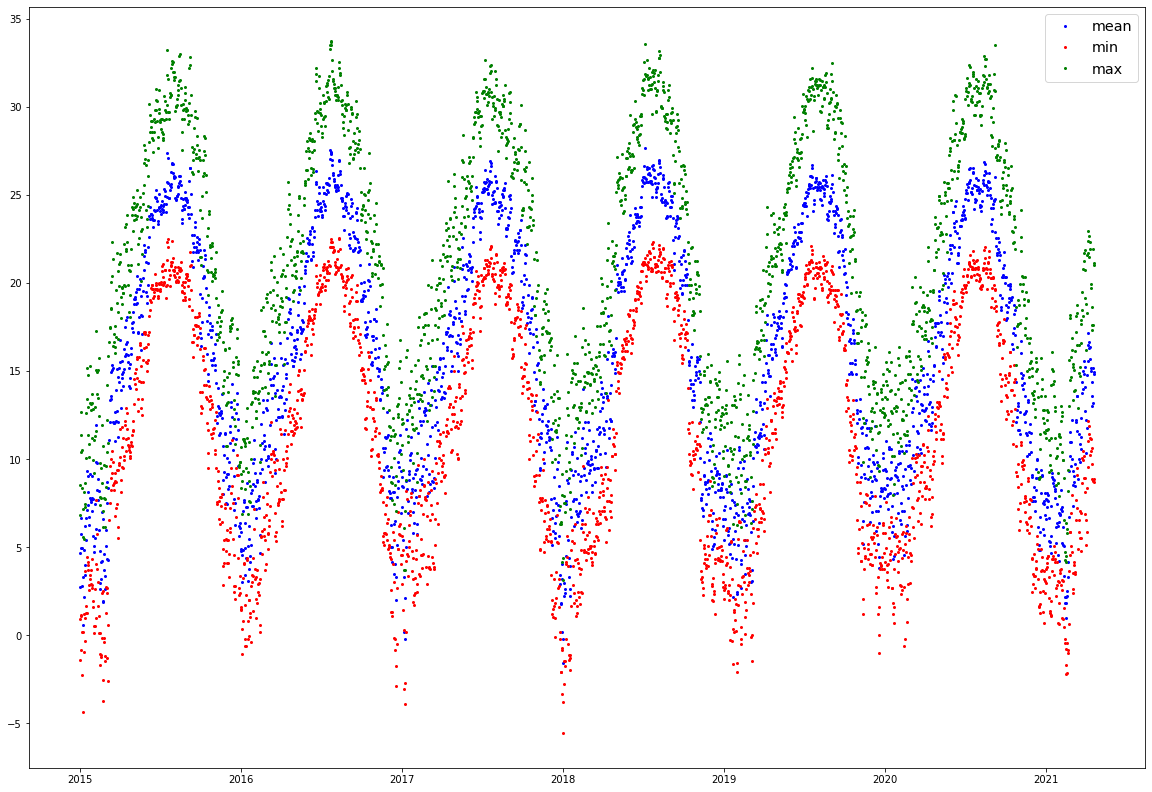

In [255]:
plt.rcParams["figure.figsize"] = (20,14)
plt.rcParams["legend.fontsize"] =  'x-large'

plt.plot(mgd['location_date'],mgd['temp_mean_c'],'bo',markersize=2,label='mean')
plt.plot(mgd['location_date'],mgd['temp_min_c'],'ro',markersize=2,label='min')                               
plt.plot(mgd['location_date'],mgd['temp_max_c'],'go',markersize=2,label='max')

plt.legend()                          
plt.show()

### Mean/Min/Max by Month

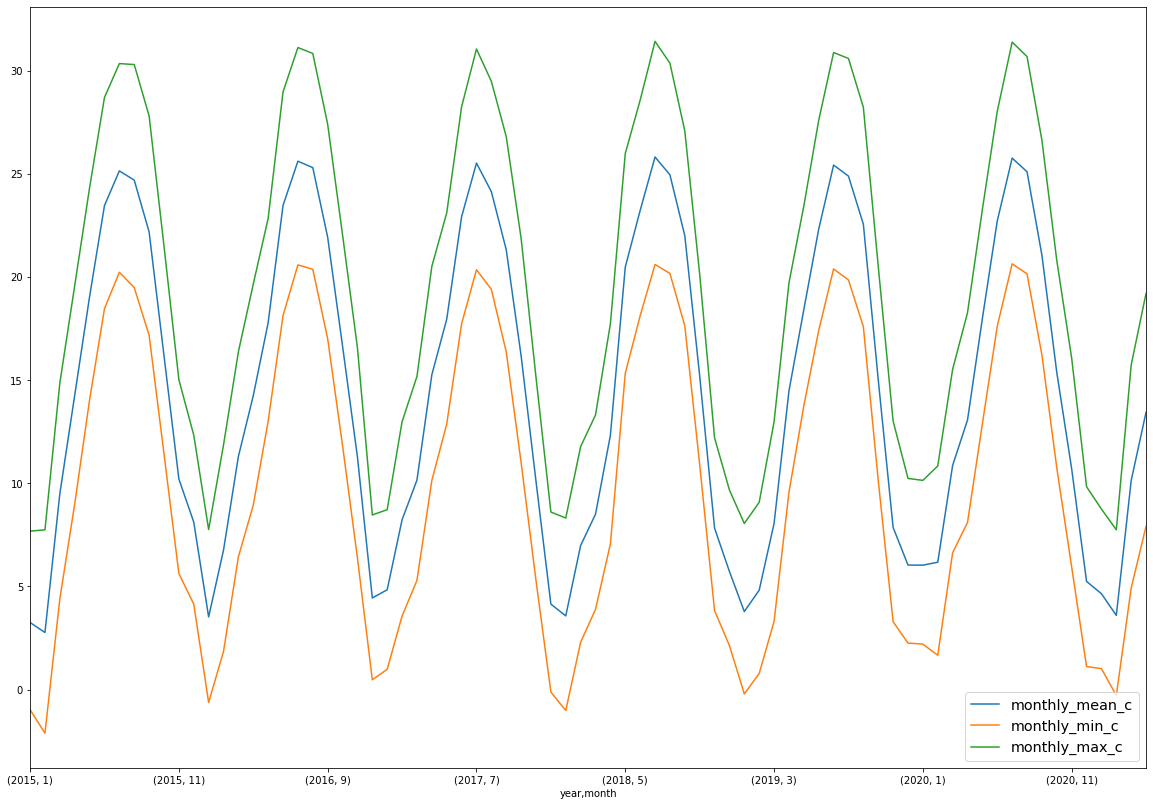

In [256]:
monthly_df = mgd.groupby(['year','month']).mean()[['monthly_mean_c','monthly_min_c','monthly_max_c']]
monthly_df.plot()

### Missing Data

In [278]:
### Spikes correspond to missing data; a complete day has 30 datapoints. Deeper spikes indicate more missing data

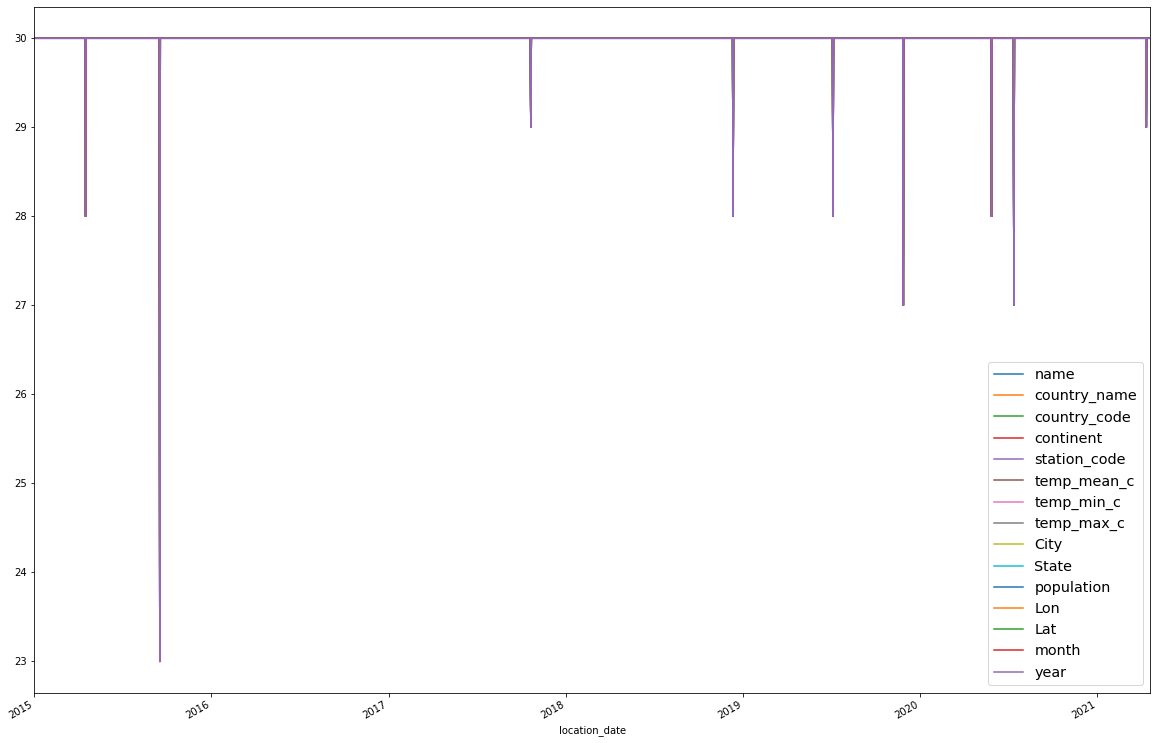

In [279]:
df.groupby('location_date').count().plot()